## 2.3 Funadmentals of Visualizations Libraries Part 1

### Content

#### 1. Import Libraries and Data

#### 2. Line Chart: Temperatures in 2022

#### 3. Aggregating Trips: Calculating Number of Daily rides

#### 4. Create Dual Axis Plot with Temperature and Daily Bike Rides

#### 5. Explanation of Code

#### 6. Bonus Task: Histogram of Trip Durations

### 1. Import Libraries and Data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from datetime import datetime as dt

In [2]:
import matplotlib
matplotlib.__version__

'3.9.3'

In [3]:
df = pd.read_csv('data/nyc_data.csv', index_col = 0)

In [4]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'end_time', 'avgTemp', '_merge'],
      dtype='object')

In [5]:
df.drop(columns = {'_merge'}, inplace = True)

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

ride_id                       object
rideable_type                 object
started_at                    object
ended_at                      object
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
start_time                    object
date                  datetime64[ns]
end_time                      object
avgTemp                      float64
dtype: object

In [8]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,end_time,avgTemp
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 18:50:39,2022-01-26,2022-01-26 18:51:53,-2.3
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28 13:14:07,2022-01-28,2022-01-28 13:20:23,0.1
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10 19:55:13,2022-01-10,2022-01-10 20:00:37,1.6
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 07:54:57,2022-01-26,2022-01-26 07:55:22,-2.3
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13 18:44:46,2022-01-13,2022-01-13 18:45:43,4.0


### 2. Basic Plotting with Pandas: Line Chart of Temperatures in 2022

In [9]:
df_temp = df.set_index('date')

In [10]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,avgTemp
date,,,,,,,,,,,,,,,,
2022-01-26,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 18:50:39,2022-01-26 18:51:53,-2.3
2022-01-28,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-28 13:14:07,2022-01-28 13:20:23,0.1
2022-01-10,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-10 19:55:13,2022-01-10 20:00:37,1.6
2022-01-26,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-26 07:54:57,2022-01-26 07:55:22,-2.3
2022-01-13,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-13 18:44:46,2022-01-13 18:45:43,4.0


In [11]:
# sort by date

df_temp = df_temp.sort_index()

In [12]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,avgTemp
date,,,,,,,,,,,,,,,,
2022-01-01,09517A19F52C8FE4,classic_bike,2022-01-01 14:51:51,2022-01-01 15:24:32,Newport PATH,JC066,Newport PATH,JC066,40.727224,-74.033759,40.727224,-74.033759,casual,2022-01-01 14:51:51,2022-01-01 15:24:32,11.6
2022-01-01,C7B485FB3EEC674C,classic_bike,2022-01-01 15:12:06,2022-01-01 15:27:53,Bergen Ave,JC095,Washington St,JC098,40.722104,-74.071455,40.724294,-74.035483,casual,2022-01-01 15:12:06,2022-01-01 15:27:53,11.6
2022-01-01,A68C233443AF7685,classic_bike,2022-01-01 20:16:22,2022-01-01 20:22:58,Sip Ave,JC056,Bergen Ave,JC095,40.730897,-74.063913,40.722104,-74.071455,member,2022-01-01 20:16:22,2022-01-01 20:22:58,11.6
2022-01-01,F68B9199E986F2CA,classic_bike,2022-01-01 18:57:13,2022-01-01 19:06:56,Newport Pkwy,JC008,Jersey & 3rd,JC074,40.728745,-74.032108,40.723332,-74.045953,member,2022-01-01 18:57:13,2022-01-01 19:06:56,11.6
2022-01-01,F599BA9B9A1161ED,classic_bike,2022-01-01 00:24:59,2022-01-01 00:35:17,Columbus Dr at Exchange Pl,JC106,Jersey & 3rd,JC074,40.716870,-74.032810,40.723332,-74.045953,casual,2022-01-01 00:24:59,2022-01-01 00:35:17,11.6


<Axes: xlabel='date'>

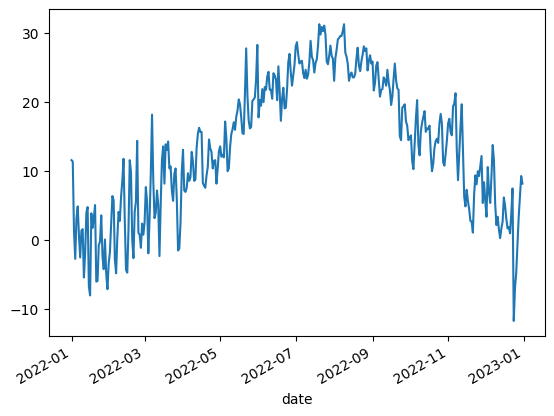

In [13]:
df_temp['avgTemp'].plot()

### Procedural Approach

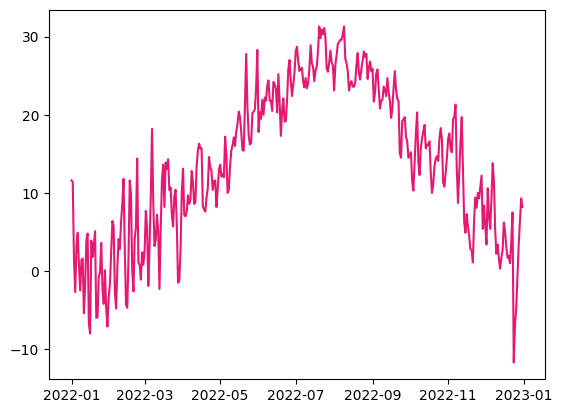

In [14]:
plt.plot(df_temp['avgTemp'], color = '#e51872')
plt.show()

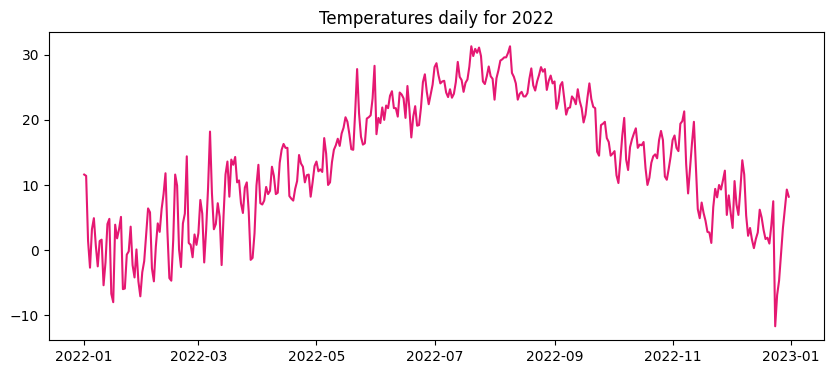

In [15]:
plt.figure(figsize=(10,4))
plt.title('Temperatures daily for 2022')
plt.plot(df_temp['avgTemp'], color = '#e51872')
plt.show()

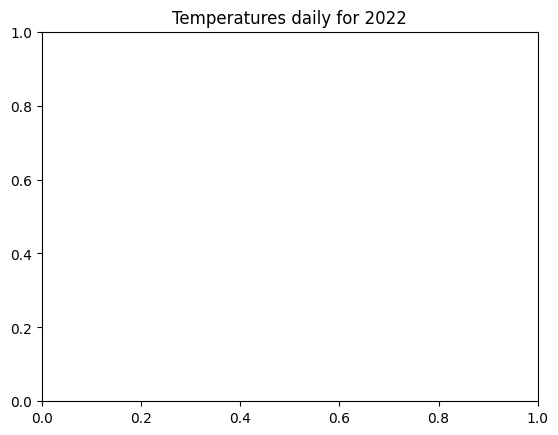

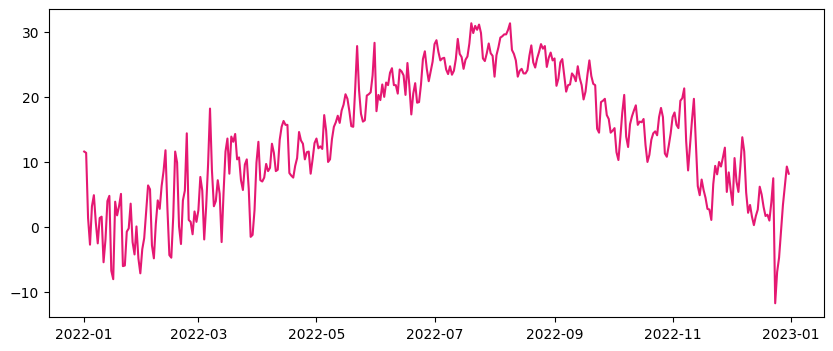

In [16]:
plt.title('Temperatures daily for 2022')
plt.figure(figsize=(10,4))
plt.plot(df_temp['avgTemp'], color = '#e51872')
plt.show()

### 3. Aggregating Trips: Calculating Number of Daily rides

#### Create a column with number of daily rides and merge it with the weather dataframe

In [17]:
df.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'date', 'end_time', 'avgTemp'],
      dtype='object')

In [18]:
# Groupby the count of the trips 

df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()

In [19]:
df_group.head()

,date,ride_id
0,2022-01-01,592
1,2022-01-02,1248
2,2022-01-03,832
3,2022-01-04,934
4,2022-01-05,914


In [20]:
df_group.rename(columns = {'ride_id':'bike_rides_daily'}, inplace = True)
df = df.merge(df_group, on = "date", how = 'outer', indicator = True)
print(df['_merge'].value_counts(dropna = False))
print("Shape of January 1st is", df[df['date'] == '2022-01-01'].shape) # Check 
print("Shape of January 2nd is", df[df['date'] == '2022-01-02'].shape) # Second check 

df_temp = df.set_index('date')

print(df_temp.columns)

_merge
both          895485
left_only          0
right_only         0
Name: count, dtype: int64
Shape of January 1st is (592, 19)
Shape of January 2nd is (1248, 19)
Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual', 'start_time', 'end_time', 'avgTemp',
       'bike_rides_daily', '_merge'],
      dtype='object')


In [21]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01 09:21:14,2022-01-01 09:35:46,11.6,592,both
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01 02:43:56,2022-01-01 02:43:57,11.6,592,both
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01 02:13:33,2022-01-01 02:18:42,11.6,592,both
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01 17:18:46,2022-01-01 18:55:25,11.6,592,both
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01 11:23:32,2022-01-01 11:29:27,11.6,592,both


### 4. Create Dual Axis Plot with Temperature and Daily Bike Rides

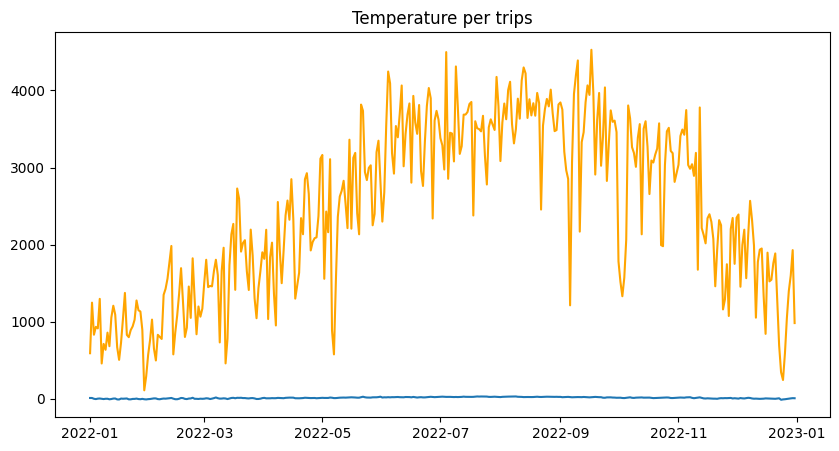

In [22]:
plt.figure(figsize=(10,5))
plt.title('Temperature per trips')
plt.plot(df_temp['avgTemp'])
plt.plot(df_temp['bike_rides_daily'], color = 'orange')
plt.show()

### OO Approach

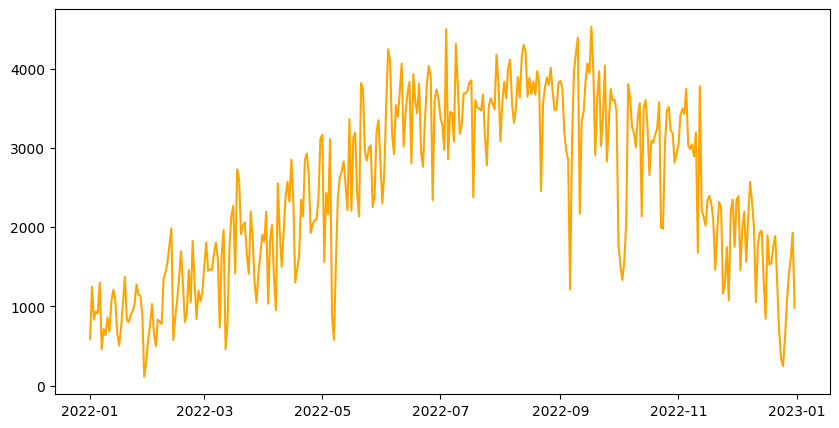

In [23]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "orange")

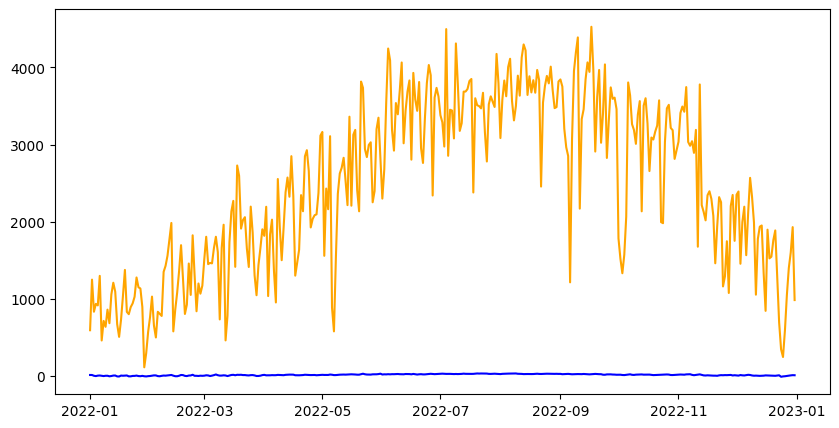

In [24]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "orange")
ax.plot(df_temp['avgTemp'], color = 'blue')

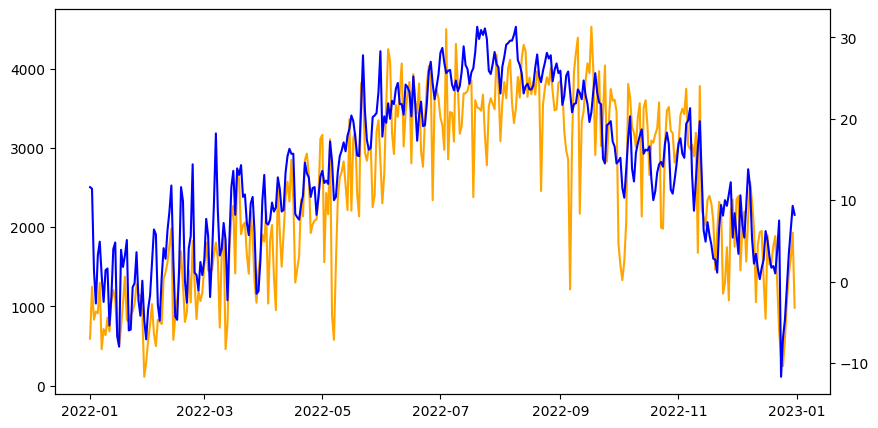

In [25]:
# Create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "orange")

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "blue")
plt.show()

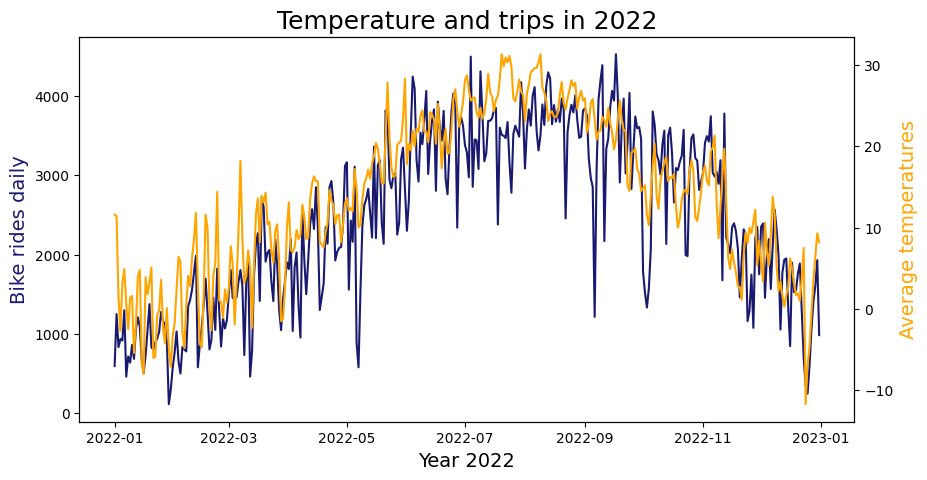

In [26]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(figsize=(10, 5))

# Make a plot of the bike rides
ax.plot(df_temp['bike_rides_daily'],color = "midnightblue")
ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label
ax.set_ylabel("Bike rides daily",color = "midnightblue", fontsize = 14) # set y-axis label

# Here is where we create the dual axis - initialize a twin object for two different y-axis on the sample plot
ax2 = ax.twinx()

# Make a plot with the temperatues on the y-axis using second axis object
ax2.plot(df_temp["avgTemp"], color = "orange")
ax2.set_ylabel("Average temperatures", color = "orange",fontsize=14)
plt.title('Temperature and trips in 2022', fontsize = 18)
plt.show()

### 5. Briefly explain code; how did I use Matplotlib to achieve this? Which paradigm was used?
I used the following code to create aggregate the number of rides per day, by counting the number "ride_id" per date.
##### "df_group = pd.DataFrame(df.groupby(['date'])['ride_id'].count()).reset_index()"
#### For the Dual Axis
I used the following code to plot the daily bike rides and label the x and y axes - I set the color to midnight blue (for both the y axis label and the line itself)
"ax.plot(df_temp['bike_rides_daily'],color = "midnightblue") ax.set_xlabel("Year 2022", fontsize = 14) # set x-axis label ax.set_ylabel("Bike rides daily",color = "midnightblue", fontsize = 14) # set y-axis label"
##### This code was used to activate the dual axis: "ax2 = ax.twinx()"
I used a similar code for average temperature on the corresponding days, this time, seting the color to orange
"ax2.plot(df_temp["avgTemp"], color = "orange") ax2.set_ylabel("Average temperatures", color = "orange",fontsize=14) plt.title('Temperature and trips in 2022', fontsize = 18)"
#### For Separated Axes
I used "ax[0]" and "ax[1]" to separate the axes
"ax[0].plot(df_temp['bike_rides_daily'],color = "midnightblue")" "ax[1].plot(df_temp["avgTemp"], color = "orange")"

In [27]:
plt.style.use('ggplot')

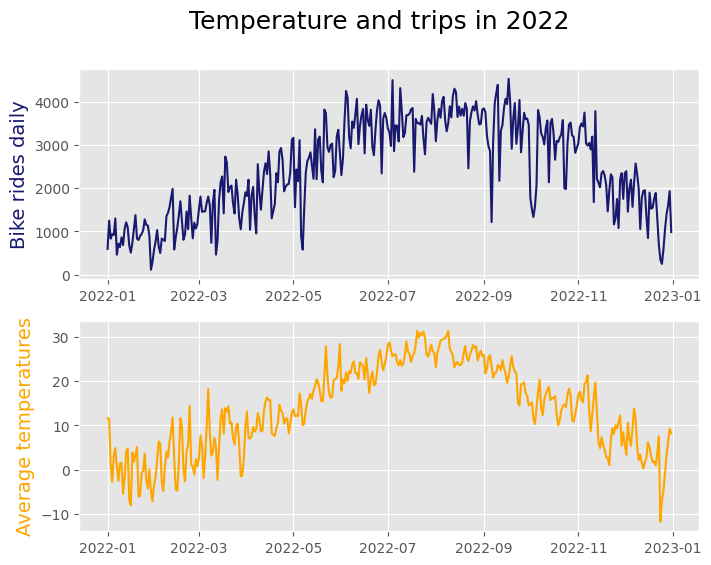

In [28]:
# Create figure and axis objects with subplots() and details

fig,ax = plt.subplots(2, figsize =(8, 6))

# Make a plot of the bike rides
ax[0].plot(df_temp['bike_rides_daily'],color = "midnightblue")
ax[0].set_ylabel("Bike rides daily",color = "midnightblue", fontsize = 14) # set y-axis label

# Make a plot with the temperatues on the y-axis using second axis object
ax[1].plot(df_temp["avgTemp"], color = "orange")
ax[1].set_ylabel("Average temperatures", color = "orange",fontsize=14)
plt.suptitle('Temperature and trips in 2022', fontsize = 18)

plt.show()

In [29]:
# save the plot as a file
fig.savefig('1trips_temperatures_dual_line.jpg',
            format='jpeg',
            dpi=100,
            bbox_inches='tight')

### 6. Bonus Task: Histogram of Trip Duration

In [30]:
df_temp.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,avgTemp,bike_rides_daily,_merge
date,,,,,,,,,,,,,,,,,,
2022-01-01,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01 09:21:14,2022-01-01 09:35:46,11.6,592,both
2022-01-01,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01 02:43:56,2022-01-01 02:43:57,11.6,592,both
2022-01-01,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01 02:13:33,2022-01-01 02:18:42,11.6,592,both
2022-01-01,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01 17:18:46,2022-01-01 18:55:25,11.6,592,both
2022-01-01,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01 11:23:32,2022-01-01 11:29:27,11.6,592,both


In [31]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,date,end_time,avgTemp,bike_rides_daily,_merge
0,115C78C3039FFA89,electric_bike,2022-01-01 09:21:14,2022-01-01 09:35:46,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,2022-01-01 09:21:14,2022-01-01,2022-01-01 09:35:46,11.6,592,both
1,7FFD810CAA7A919E,classic_bike,2022-01-01 02:43:56,2022-01-01 02:43:57,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,2022-01-01 02:43:56,2022-01-01,2022-01-01 02:43:57,11.6,592,both
2,E715E8432031B72C,classic_bike,2022-01-01 02:13:33,2022-01-01 02:18:42,Essex Light Rail,JC038,Washington St,JC098,40.712774,-74.036486,40.724294,-74.035483,member,2022-01-01 02:13:33,2022-01-01,2022-01-01 02:18:42,11.6,592,both
3,BF1B7B1E1961A87B,electric_bike,2022-01-01 17:18:46,2022-01-01 18:55:25,Grand St,JC102,W 27 St & 7 Ave,6247.06,40.715178,-74.037683,40.746647,-73.993915,casual,2022-01-01 17:18:46,2022-01-01,2022-01-01 18:55:25,11.6,592,both
4,4A01F0E53C6F4386,electric_bike,2022-01-01 11:23:32,2022-01-01 11:29:27,Christ Hospital,JC034,Hoboken Terminal - Hudson St & Hudson Pl,HB101,40.734786,-74.050444,40.735938,-74.030305,member,2022-01-01 11:23:32,2022-01-01,2022-01-01 11:29:27,11.6,592,both


In [32]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

In [33]:
df['trip_duration'] = (df['end_time'] - df['start_time']).dt.total_seconds() / 60

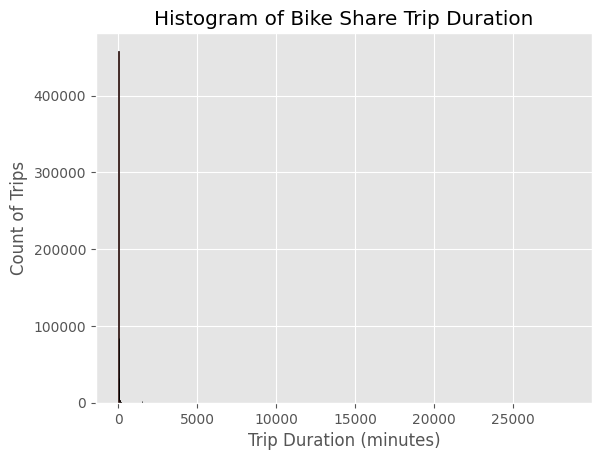

In [34]:
plt.hist(df['trip_duration'], bins=range(5, int(df['trip_duration'].max()) + 10, 10), edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count of Trips')
plt.title('Histogram of Bike Share Trip Duration')
plt.show()

##### This is a strange result - the max duration was 28,541 minutes, which is obviously an outlier

In [35]:
df['trip_duration'].describe()

count    895485.000000
mean         17.542010
std         126.700135
min         -55.516667
25%           4.516667
50%           7.200000
75%          12.250000
max       28541.500000
Name: trip_duration, dtype: float64

##### I will attempt to remove the outliers and try the histogram again

In [36]:
#Removing Outliers
Q1 = df['trip_duration'].quantile(0.25)
Q3 = df['trip_duration'].quantile(0.75)
IQR = Q3 - Q1

In [37]:
# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [38]:
df_filtered = df[(df['trip_duration'] >= lower_bound) & (df['trip_duration'] <= upper_bound)]

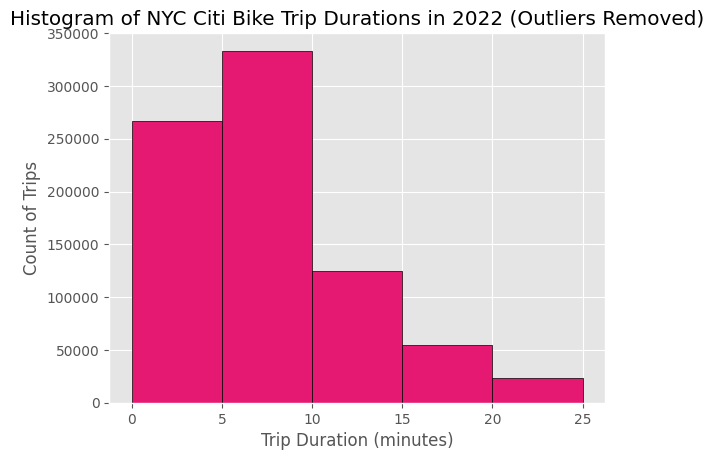

In [40]:
plt.hist(df_filtered['trip_duration'], bins=range(0, int(df_filtered['trip_duration'].max()) + 5, 5), color='#e51872', edgecolor='black')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count of Trips')
plt.title('Histogram of NYC Citi Bike Trip Durations in 2022 (Outliers Removed)')
plt.show()

In [41]:
# Attempt to add curves

import seaborn as sns

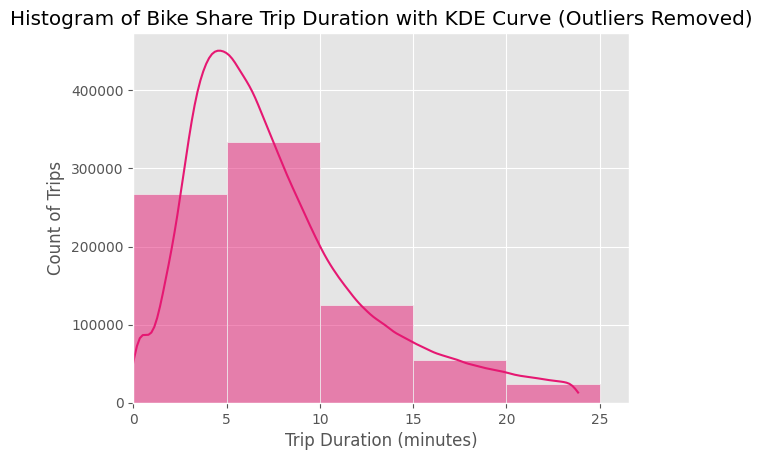

In [42]:
# Plot the histogram and KDE curve using seaborn
sns.histplot(df_filtered['trip_duration'], bins=range(0, int(df_filtered['trip_duration'].max()) + 5, 5), kde=True, color='#e51872')

# Set x-axis to start at 0
plt.xlim(0, None)

# Add labels and title
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Count of Trips')
plt.title('Histogram of Bike Share Trip Duration with KDE Curve (Outliers Removed)')

# Show the plot
plt.show()